# Training set/ Test Set


In [6]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import random

In [3]:
x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

#test set
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([3, nb_classes]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')


logits = tf.matmul(X, W) + b

hypothesis = tf.nn.softmax(logits)

#cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y)
#cost = tf.reduce_mean(cost_i)
cost = tf.reduce_sum(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))


optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

predicted = tf.argmax(hypothesis, 1)
correct = tf.equal(predicted, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32)) * 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X: x_data, Y: y_data})
        print(step, cost_val,'\n', W_val,'\n')
            
    #test
    pre, cor, acc = sess.run([predicted, correct, accuracy], feed_dict = {X: x_test, Y: y_test})
    print("predicted : {}, correct : {}, accuracy : {}%".format(pre, cor, acc))
    
        

0 36.0555 
 [[ 1.33515573  0.19180547 -0.49668461]
 [ 1.64573181  1.36692595 -1.46070886]
 [ 0.3937428   2.39522219 -1.05049407]] 

1 66.1164 
 [[ 1.42237628 -0.19541262 -0.19668713]
 [ 2.68070841 -0.46804571 -0.66071391]
 [ 1.53922486  0.54974258 -0.35049659]] 

2 116.124 
 [[ 0.82238042  0.10458528  0.10331082]
 [ 0.48071671  0.93194997  0.13928199]
 [-0.66077089  2.04974031  0.34950131]] 

3 52.3122 
 [[ 1.01006484 -0.37138134  0.39159304]
 [ 1.75545669 -1.11820757  0.91469949]
 [ 0.6262778   0.07569277  1.03649998]] 

4 63.7544 
 [[ 0.53896236 -0.07138929  0.56270349]
 [-0.07387269  0.28177619  1.34404516]
 [-1.05194426  1.57568252  1.21473229]] 

5 67.2447 
 [[ 0.73874885  0.21956947  0.07195827]
 [ 1.22569489  1.66012836 -1.3338747 ]
 [ 0.24783671  3.03876281 -1.54812896]] 

6 92.4552 
 [[ 0.92957264 -0.27124804  0.37195197]
 [ 2.5069592  -0.42112327 -0.53388733]
 [ 1.53827381  1.04833198 -0.84813523]] 

7 97.7438 
 [[ 0.32960582  0.02873775  0.671933  ]
 [ 0.30702639  0.97884786

# Non-normalized inputs
- need nomalization/ regularization

## 데이터 안에 비정상적으로 큰 수가 있는경우

case1) Not normalized

In [4]:
xy = np.array([[828.6559973, 833.450012, 908100, 828.349976, 831.659973],
             [823.02002, 828, 1828100, 821, 828],
             [819, 824, 1438100, 818, 824],
             [816, 820, 1008100, 815, 819],
             [819, 823, 1188100, 818, 818],
             [819, 823, 1198100, 816, 820],
             [811, 815, 1098100, 809, 812],
             [809, 816, 1398100, 804, 809]])

x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

X = tf.placeholder(tf.float32, shape = [None, 4])
Y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([4,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        cost_val, hy_val, _ = sess.run([cost, hypothesis, optimizer], feed_dict ={X: x_data, Y: y_data})
        print(step, "\ncost : {} \n prediction : \n {}".format(cost_val, hy_val))

0 
cost : 2841961299968.0 
 prediction : 
 [[-1189026.625]
 [-2392255.75 ]
 [-1882181.25 ]
 [-1319791.875]
 [-1555213.375]
 [-1568290.   ]
 [-1437491.   ]
 [-1829846.75 ]]
1 
cost : 3.122407571942973e+33 
 prediction : 
 [[  3.94163193e+16]
 [  7.93490999e+16]
 [  6.24210747e+16]
 [  4.37568390e+16]
 [  5.15697754e+16]
 [  5.20038248e+16]
 [  4.76633051e+16]
 [  6.06848642e+16]]
2 
cost : inf 
 prediction : 
 [[ -1.30650718e+27]
 [ -2.63013293e+27]
 [ -2.06903079e+27]
 [ -1.45037968e+27]
 [ -1.70934983e+27]
 [ -1.72373711e+27]
 [ -1.57986476e+27]
 [ -2.01148182e+27]]
3 
cost : inf 
 prediction : 
 [[  4.33059514e+37]
 [  8.71793133e+37]
 [  6.85808254e+37]
 [  4.80747972e+37]
 [  5.66587135e+37]
 [  5.71355986e+37]
 [  5.23667578e+37]
 [  6.66732851e+37]]
4 
cost : inf 
 prediction : 
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
5 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
6 
cost : nan 
 prediction : 
 [[ nan]
 [ 

case2) normalized

In [5]:
xy = np.array([[828.6559973, 833.450012, 908100, 828.349976, 831.659973],
             [823.02002, 828, 1828100, 821, 828],
             [819, 824, 1438100, 818, 824],
             [816, 820, 1008100, 815, 819],
             [819, 823, 1188100, 818, 818],
             [819, 823, 1198100, 816, 820],
             [811, 815, 1098100, 809, 812],
             [809, 816, 1398100, 804, 809]])
#normalize
xy = (xy - np.mean(xy))/ np.sqrt(np.var(xy))from tensorflow.examples.tutorials.mnist import input_data
#one hot 인코딩 처리 안해도 불러올때 자동으로 onehot 처리 가능
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')

hypthesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis =1))

optimizer = tf.train.Gradieny
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session
batch_xs, batch_ys = mnist.train.next_batch(100)


print(xy)

x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

X = tf.placeholder(tf.float32, shape = [None, 4])
Y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([4,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        cost_val, hy_val, _ = sess.run([cost, hypothesis, optimizer], feed_dict ={X: x_data, Y: y_data})
        print(step, "\ncost : {} \n prediction : \n {}".format(cost_val, hy_val))

SyntaxError: invalid syntax (<ipython-input-5-cdcbb48f6b12>, line 10)

# MNIST Dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch : 0001 cost = 2.624817617
Epoch : 0002 cost = 1.076346575
Epoch : 0003 cost = 0.867503376
Epoch : 0004 cost = 0.763897272
Epoch : 0005 cost = 0.696655844
Epoch : 0006 cost = 0.648279464
Epoch : 0007 cost = 0.612026922
Epoch : 0008 cost = 0.582266042
Epoch : 0009 cost = 0.557825140
Epoch : 0010 cost = 0.537551680
Epoch : 0011 cost = 0.519631909
Epoch : 0012 cost = 0.504753289
Epoch : 0013 cost = 0.491505434
Epoch : 0014 cost = 0.479394193
Epoch : 0015 cost = 0.468866428
Accuracy :  0.8897
Label : [7]
prediction: [7]


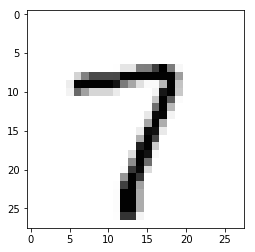

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
#one hot 인코딩 처리 안해도 불러올때 자동으로 onehot 처리 가능
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis =1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
#parameter
# 데이터가 많기 때문에 한꺼번에 학습시키지 않고 몇개로 나누어서 학습시킨다. 
# epoch  : 전체 데이터를 한번 학습시키면 1 epoch라고 한다. 
# 전체 데이터에서 몇개로 나누면 batch_size
# 만약 1000개의 데이터샘플에서 batch_size 가 500일경우 1 epoch를 완료하는데에 iteration은 2번이 필요하다.
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print("Epoch : {:04d} cost = {:.9f}".format(epoch+1, avg_cost))
    #accuracy report
    #sess.run없이 돌리는 방법       
    print("Accuracy : ", accuracy.eval(session = sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label :", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()